This Lab is intended to code a Linear Regression algorithm in Python but only for two parameters, as demonstration purposes of the inner workings on this model.

In [2]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

<a name="toc_40291_2"></a>
# Problem Statement

Two data points - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

We load these values into two datasets, represented by NumPy arrays. To have a better undestanding, the features or x(i) values correspond to the first column, whereas the targets or y(i) values correspond to the second column. So, if this table is interpreted in a columnar fashion, it's appropriate to have one dataset for each, as follows:

In [3]:
x_train = np.array([1, 2])
y_train = np.array([300, 500])

The following is a simple 2D plot of the simple training set

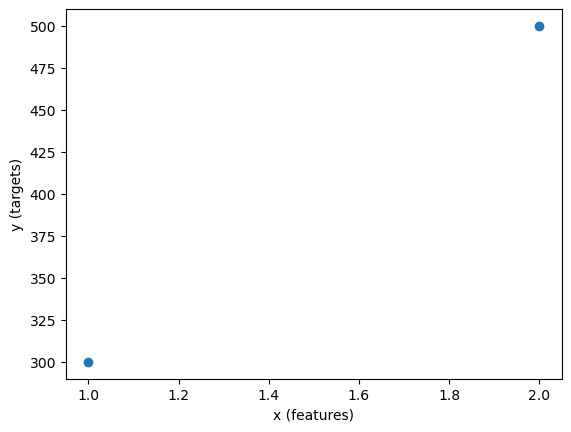

In [4]:
plt.scatter(x_train, y_train)
plt.xlabel('x (features)')
plt.ylabel('y (targets)')
plt.show()

The following method includes a function to compute the cost for a particular choice of 'w' and 'b' (bias) parameters

In [5]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    # Initial cost
    cost = 0
    # Loop through all the features as the model is applied to them, then apply the cost function calculations
    for i in range(m):
        f_wb = w * x[i] + b # Model
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost
    return total_cost

<a name="toc_40291_2.1"></a>
## Gradient descent summary
We have a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

The above python function is a simple implementation of the cost function described here.


*Gradient descent* is described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

To apply a gradient descent algorithm in code, we need to define the following two more functions, as cost is already defined above:

- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from above function defined in Python)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.

In [17]:
# Compute gradient implements (4) and (5) above, that is, the needed partial derivatives of the cost function.
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    dj_dw = 0
    dj_db = 0
    m = x.shape[0]
    
    for i in range(m):
        fw_b = w * x[i] + b # Model
        dj_dw += (fw_b - y[i]) * x[i]
        dj_db += (fw_b - y[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    #Return a tuple with both gradients calculated for each partial derivative
    return dj_dw, dj_db

The following is the implementation, putting all the previous Python functions together, of the Gradient Descent Algorithm to try to converge on as low as cost as possible for both parameters. It's also the implemenation of (3) algorithm above.

In [24]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
    """
    m = x.shape[0]
    w = w_in
    b = b_in
    for i in range(num_iters):
        # Calculate the gradients
        dj_dw, dj_db = gradient_function(x, y, w, b)
        # Upgrade the parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        # Can be commented out, print cost per iteration
        print(f'Cost fow w: {w} and b: {b} -> Total Cost: {cost_function(x, y, w, b)}')
    return w,b

Now we can apply the gradient descent algorithm

In [26]:
# Usually intialize the parameters 'w' and 'b' as zero, though not always
w = 0
b = 0
# And define an alpha or learning rate for gradient descent between 0 and 1
alpha = 1.0e-2
iterations = 10000
# Run gradient descent for the training set
w_final, b_final = gradient_descent(x_train, y_train, w, b, alpha, iterations, compute_cost, compute_gradient)
# Print the values obtained
print(f'w obtained: {w_final} and b obtained: {b_final}')

Cost fow w: 6.5 and b: 4.0 -> Total Cost: 79274.8125
Cost fow w: 12.7775 and b: 7.862500000000001 -> Total Cost: 73935.3097265625
Cost fow w: 18.840125 and b: 11.5922125 -> Total Cost: 68955.50943163194
Cost fow w: 24.6952386875 and b: 15.1936885 -> Total Cost: 64311.1797016098
Cost fow w: 30.3499523928125 and b: 18.6713230346875 -> Total Cost: 59979.72104335757
Cost fow w: 35.81113373747188 and b: 22.02936051844844 -> Total Cost: 55940.056413659375
Cost fow w: 41.08541498625836 and b: 25.271899907201878 -> Total Cost: 52172.52865702032
Cost fow w: 46.17920111299387 and b: 28.402899683335985 -> Total Cost: 48658.804852726775
Cost fow w: 51.098677589918985 and b: 31.426182669807716 -> Total Cost: 45381.78710571535
Cost fow w: 55.849817910123896 and b: 34.345440679260854 -> Total Cost: 42325.52934715345
Cost fow w: 60.43839085218188 and b: 37.164239003816384 -> Total Cost: 39475.15973987783
Cost fow w: 64.86996749582009 and b: 39.88602075099549 -> Total Cost: 36816.808311111134
Cost fow 

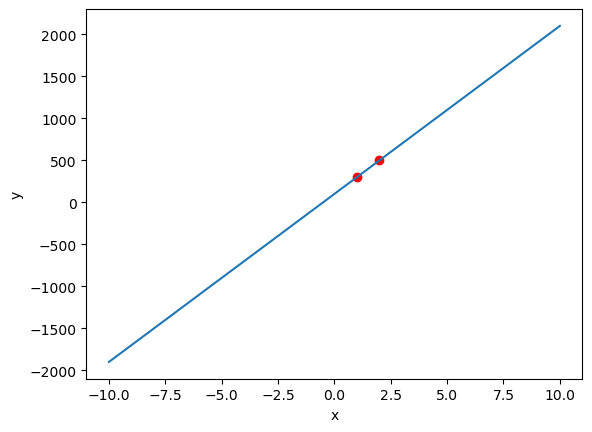

In [27]:
# We can plot the function to compare with the scatter plot of above

# Create a range of x values
x = np.linspace(-10, 10, 100)

# Compute the corresponding y values using the function f(x) = x*w + b
y = x * w_final + b_final

# Plot the function and original training set
plt.plot(x, y)
# Plot the x/y points
plt.scatter(x_train, y_train, color='red')

plt.xlabel('x')
plt.ylabel('y')

plt.show()